Disclaimer: Kindly be aware that the questions and datasets featured in this tutorial were originally presented by [Ryan Abernathy in "An Introduction to Earth and Environmental Data Science"](https://earth-env-data-science.github.io/intro.html).

# Pandas Fundamentals with Earthquake Data

Welcome to this practical tutorial on `Pandas`, here we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Note**:  `%matplotlib inline` is a command specific to Jupyter Notebook and JupyterLab, to enable the inline plotting of graphs and visualizations. It is typically used to display these plots directly below the code cell in the notebook.

Data is in .csv format and downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/) is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You can open this file directly with Pandas.

### Using Pandas' read_csv function directly on a URL to open it as a DataFrame

In [2]:
#url for data
url = "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
#read file using pandas
data = pd.read_csv(url)

`Pandas` provides various methods for fetching and reading data depending on the file type. Here, , since the file is in  `.csv` format, we will untilize the `pd.read_csv()` function and assign the resulting DataFrame to the variable `data`.


<br>

In [3]:
#display first 5 rows
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


The `pd.DataFrame.head()` function returns the first 5 rows of a DataFrame. To display a different number of rows, an integer value can be provided within the function, such as `data.head(10)`, which would provide the first 10 rows. Similarly, the `pd.DataFrame.tail()` function presents the last 5 rows by default, displaying the final rows of the DataFrame.

<br>
<br>


In [4]:
#data types and summaries

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


While we can onserve the first few rows of the data, it doesn't provide comprehensive information about the entire DataFrame. For this `Pandas` offers the `pd.DataFrame.info()`. This function provies a basic summary of the DataFrame which includes counts of non-null values, data types, field names and other details. 

You should have seen that the dates were not automatically parsed into datetime types. `pd.read_csv()` actucally provides options for dealing with this. Let's take a look.



### Re-Reading Data: Defining Date Columns and Index


In [5]:
#read file using pandas
data = pd.read_csv(url, parse_dates=['time','updated'], index_col='id') #date cols specified and index col specified

#display first 5 rows
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [6]:
#display dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

By including the `parse_dates` argument of `pd.read_csv` and a list of datetime columns, we can automatically convert these fields at the time of loading the DataFrame. 

### Using `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [7]:
#describe dataframe and transposing it to make it more readable
data.describe().T

# T - transpose dataframe

,count,mean,min,25%,50%,75%,max,std
time,120108,2014-07-05 09:10:37.116720128,2014-01-01 00:01:16.610000,2014-04-08 03:43:10.768999936,2014-07-07 10:44:06.035000064,2014-09-30 23:36:40.595000064,2014-12-31 23:54:33.900000,NaN
latitude,120108.0,38.399579,-73.462,34.228917,38.8053,53.8895,86.6514,21.938258
longitude,120108.0,-99.961402,-179.9989,-147.742025,-120.832,-116.0681,179.998,82.996858
depth,120107.0,28.375029,-9.9,4.1,9.2,22.88,697.36,62.215416
mag,120065.0,1.793958,-0.97,0.82,1.4,2.4,8.2,1.343466
nst,59688.0,17.878284,0.0,8.0,14.0,22.0,365.0,14.911369
gap,94935.0,124.048978,9.0,74.0,107.0,155.0,356.4,68.518595
dmin,85682.0,0.893198,0.0,0.02076,0.07367,0.447,64.498,2.903966
rms,119716.0,0.358174,0.0,0.07,0.2,0.59,8.46,0.364046


The `pd.DataFrame.describe()` function offers a statistical summary of all fields of numeric type. This summary helps in understanding the distribution of our data, a crucial aspect of exploratory data analysis.


Use of the `T` attribute (transpose), it's solely at your discretion and how you prefer to display the returned DataFrame. This option can be particularly useful in rendering high-dimensional DataFrames with few rows, making them more comprehensible.

<br>
<br>
<br>

### Using `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [8]:
#display the top 20 earthquakes by mag
data.nlargest(20,'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56+00:00,"56km WSW of Panguna, Papua New Guinea",earthquake


The `pd.Series.nlargest()` function is straightforward and incredibly useful. It operates on a `pd.Series` (a single column) and retrieves the top $n$ values. When applied within a DataFrame context, it allows us to extract the rows containing the $n$ largest values from the specified column.
<br>
<br>
<br>


Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### Extracting the state or country and adding it a new column to the dataframe called `country`. 

Note that some of the "countries" are actually U.S. states.


In [9]:
#text cleaning

#if there is a comma then split, if not just use text

def extract_locations(text):
    """ This function parses strings, splitting them based on a comma
        Then checks the length resulting list is more than zero
        Then takes the last entry from the list
        Then checks if the last in the list or the original sting itself is in the list of states
        If yes it returns USA
        If not it returns the entity
        If the entity has no comma then it returns the original text
        
        Parameters:
            text: takes a string input of variable length
        Return:
            string output of country name
    """
    
    #list of states of the US from
    # https://gist.githubusercontent.com/norcal82/e4c7e8113f377db184bb/raw/87558bb70c5c149f357663061bc1b1ab96c90b7e/state_names.py
    state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", 
                   "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas",
                   "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", 
                   "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", 
                   "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", 
                   "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", 
                   "West Virginia", "Wyoming"]
    
   
    parts = text.split(', ')
    if len(parts) > 0:
        entity = parts[-1]
        if entity in state_names or text in state_names:
            return "USA"
        return entity
        
    return np.nan

Although this function may initially seem complex, its logic is quite straightforward. Observe the pattern within the `place` column, where country names typically appear after the final comma, or there are no commas, and the country/place name is provided in full.

1. To extract the country, we split each place name at commas:
   ```python
   parts = text.split(', ')
   ```

2. We then select the last string in the created list. If commas aren't present, then the first and last string will be the same:
   ```python
   entity = parts[-1]
   ```

3. Additionally, we need to consider whether the place name is a U.S. state or not. If it is, we should return "USA"; otherwise, we can simply return `entity` as it won't be a U.S. state:
   ```python
   if entity in state_names or text in state_names:
       return "USA"
   return entity
   ```

4. While not absolutely necessary in this circumstance, it's good practice to specify behavior if the data in `place` does not meet the specified logic above. This is why the final return is:
   ```python
   return np.nan
   ```

In [10]:
data['country'] = data['place'].apply(extract_locations)
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,USA
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,USA
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,USA
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,USA
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico


Let's create a new column in the DataFrame.

1. Create a column in the DataFrame using the syntax `DataFrame['new_column']`:
   ```python
   data['country']
   ```

2. Populate the new column with data. In this case, we want to extract the country name from the `place` column. To achieve this, we need to apply a function to the data within the column. `Pandas` facilitates this through the `pd.DataFrame.apply()` function, which takes a function as its argument:
   ```python
   data['place'].apply(extract_locations)
   ```

You can also attempt this using `Pandas` [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html).
<br>
<br>

### Displaying each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [11]:
#each unique value
data.country.unique()

array(['USA', 'Mexico', 'Papua New Guinea', 'New Zealand',
       'South of the Fiji Islands', 'British Virgin Islands', 'Canada',
       'Fiji', 'Antarctica', 'Chile', 'Indonesia', 'Solomon Islands',
       'Micronesia', 'Russia', 'Philippines', 'Bolivia', 'Greece',
       'Japan', 'Iran', 'Tonga', 'Wallis and Futuna', 'CA',
       'Carlsberg Ridge', 'Pakistan',
       'Off the west coast of northern Sumatra', 'Burma', 'China', 'Peru',
       'Off the east coast of the North Island of New Zealand',
       'Costa Rica', 'Reykjanes Ridge', 'East Timor',
       'Central East Pacific Rise', 'Mid-Indian Ridge', 'Japan region',
       'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Northern Mid-Atlantic Ridge', 'Taiwan', 'South Sandwich Islands',
       'Colombia', 'Dominican Republic', 'Argentina', 'Saint Helena',
       'West of Vancouver Island', 'Tanzania', 'Vanuatu',
       'Bosnia and Herzegovina', 'India', 'Southeast of Easter Island',
       'Serbia', 'Off the coast of O

In [12]:
#number of unique country values
data.country.nunique()

286

Observe the difference between `pd.Series.unique()` and  `pd.Series.nunique()`. To get a better idea, try 

```python
len(data.country.unique())
```

Note that the `country` column is still imperfect. There are methods to further clean this column using libraries such as [SpaCy](https://spacy.io/) or [NLTK](https://www.nltk.org/) but that is outside of the scope of this tutorial. 

I recommend taking a look at a course in [Information Retrieval or Natural Language Processing](https://www.geeksforgeeks.org/natural-language-processing-nlp-tutorial/) to gain further familiarity, if interested.

### Filtering A Dataset: Magnitude 4 or Larger Earthquakes

In [19]:
#filtering in pandas

filter = data['mag']>=4
magnitude_4_and_higher = data[filter]

magnitude_4_and_higher.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08 01:43:19+00:00,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08 01:43:19+00:00,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08 01:43:19+00:00,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08 01:43:19+00:00,"72km E of Amatignak Island, Alaska",earthquake,USA
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08 01:43:19+00:00,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea


`Pandas` simplifies the process of data filtering.

1. Define our filter criteria - earthquakes with a magnitude of 4 or higher:
   ```python
   filter = data['mag'] >= 4
   ```
   This filter creates a boolean mask, marking `True` where the `mag` is greater than or equal to $4$.

2. Apply the created filter to the data:
   ```python
   data[filter]
   ```
   This operation selects all rows from the `data` DataFrame where the `filter` evaluates to `True`. You can also create more intricate filters. For instance, try filtering earthquakes between magnitudes $6$ and $9$.

   Hint - take a look [here](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)

Making a bar chart of the top 5 locations with the most earthquakes from the filtered dataset

Location name on the x axis, Earthquake count on the y axis

**Method one using nlargest()**

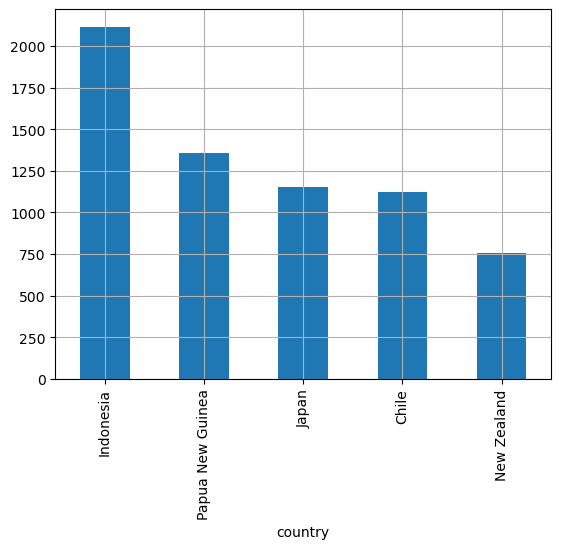

In [20]:
# get value counts of 
country_freq = magnitude_4_and_higher['country'].value_counts()

top_5 = country_freq.nlargest(5)

top_5.plot(kind='bar', grid=True)

plt.show()

`Pandas` offers the `pd.Series.value_counts()` function, which generates an ordered series displaying counts for each unique value within a series or column.

Try executing:
```python
magnitude_4_and_higher['country'].value_counts()
```

Additionally, `Pandas` seamlessly interfaces with `Matplotlib` through `pd.DataFrame.plot()`. This function allows us to specify the desired plot type and other keyword arguments, offering extensive customization options.

For example:
```python
top_5.plot(kind='bar', grid=True)
```

Refer to the documentation **[here for more detailed information](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)**.

Getting familiar with this syntax is crucial as it's extensively used in various data analysis and manipulation packages commonly utilized in scientific computing.es and research.

**Method 2 using head()**

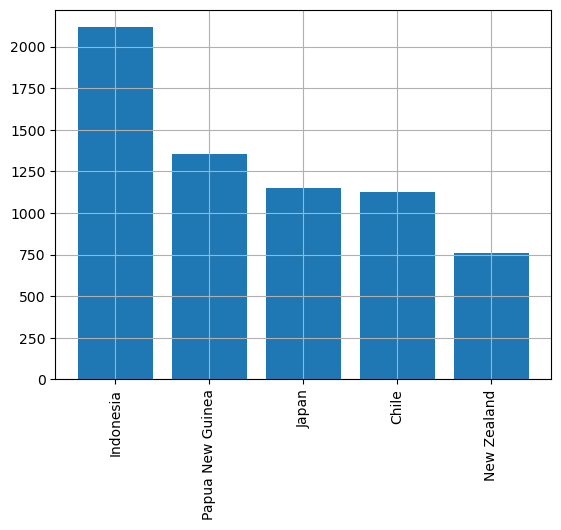

In [21]:
# get value counts
country_freq = magnitude_4_and_higher['country'].value_counts()

#get top 5 from series suing head()
top_5 = country_freq.head()

#plot bar chart using matplotlib.pyplot.bar()
plt.bar(top_5.index, top_5)

#rotate the x labels 90 degrees
plt.xticks(rotation=90)

plt.grid(which='major')

plt.show()

Notice the syntax variation when calling the `Matplotlib.pyplot.bar()` function directly instead of using `pd.DataFrame.plot()`.

The `pd.DataFrame.head()` method could be utilized similarly to the first method. This plot showcases the adaptability of `Pandas`, highlighting that there's no sole method to achieve an output. Experimenting with different methods will enhance your coding proficiency.

### Making a histogram of the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

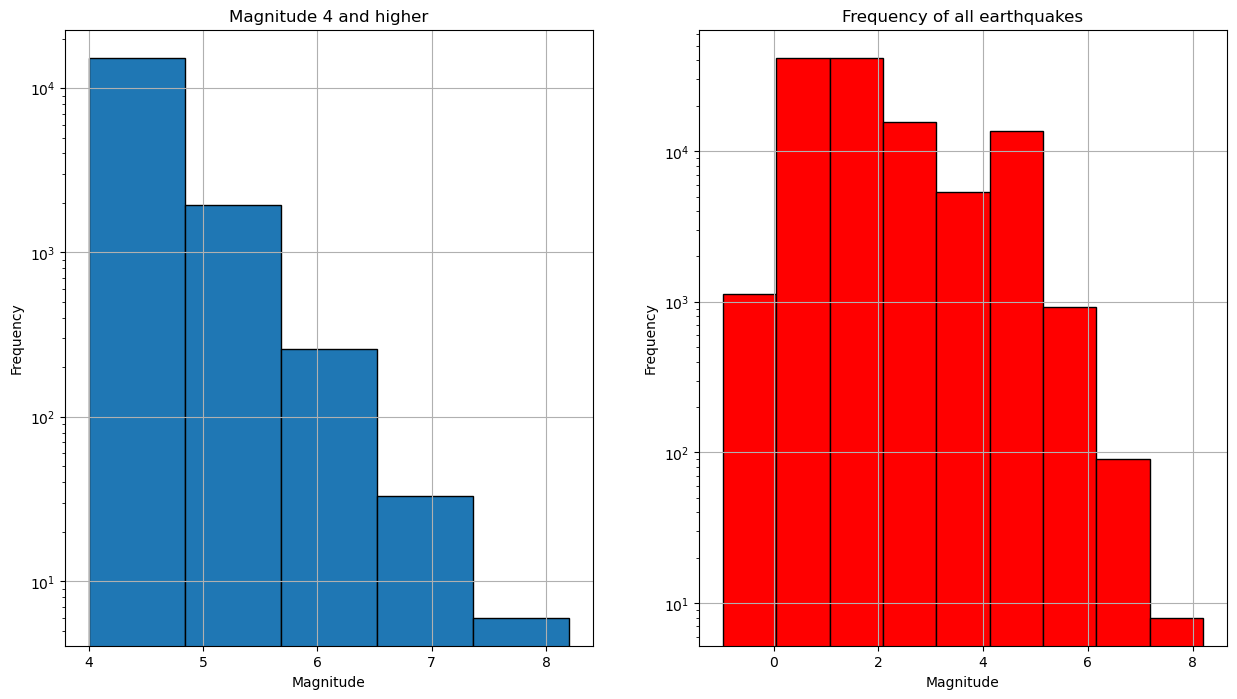

In [22]:
#create figure
plt.figure(figsize=(15,8))

#create subplots
plt.subplot(1,2,1) #1 row, 2 cols and first position
#histogram, with ylog scale, grid and edges of bins in black
magnitude_4_and_higher['mag'].plot(kind='hist',logy=True, grid=True, edgecolor='black', bins=5)

#name x axis
plt.xlabel('Magnitude')

#name subplot
plt.title('Magnitude 4 and higher')

plt.subplot(1,2,2)
data['mag'].plot(kind='hist',logy=True, grid=True, color='red', edgecolor='black', bins=9)
plt.xlabel('Magnitude')
plt.title('Frequency of all earthquakes')

plt.show()

Let's explore another effective method for creating subplots.

We can separate the figure and subplot creation steps:
```python
# Create figure
plt.figure(figsize=(15, 8))

# Create the first subplot
plt.subplot(1, 2, 1)
# Subplot code

# Create the second subplot
plt.subplot(1, 2, 2)
# Subplot code
```
Here, we establish a $1 \times 2$ subplot grid, specifying the location for the subsequent subplot as $1$ and the next as $2$.

Take note of the title creation for each plot compared to the methods used previously.

Additionally, a histogram is generated, showcasing various keyword arguments available in `pd.DataFrame.plot()`:
```python
data['mag'].plot(kind='hist', logy=True, grid=True, color='red', edgecolor='black', bins=9)
```

It's crucial to emphasize the significance of reviewing the documentation for the `pd.DataFrame.plot()` function.
<br>
<br>
<br>

### Visualising the locations of earthquakes with a scatterplot of their latitude and longitude

Examine the code block below, try to note the purpose of each step.

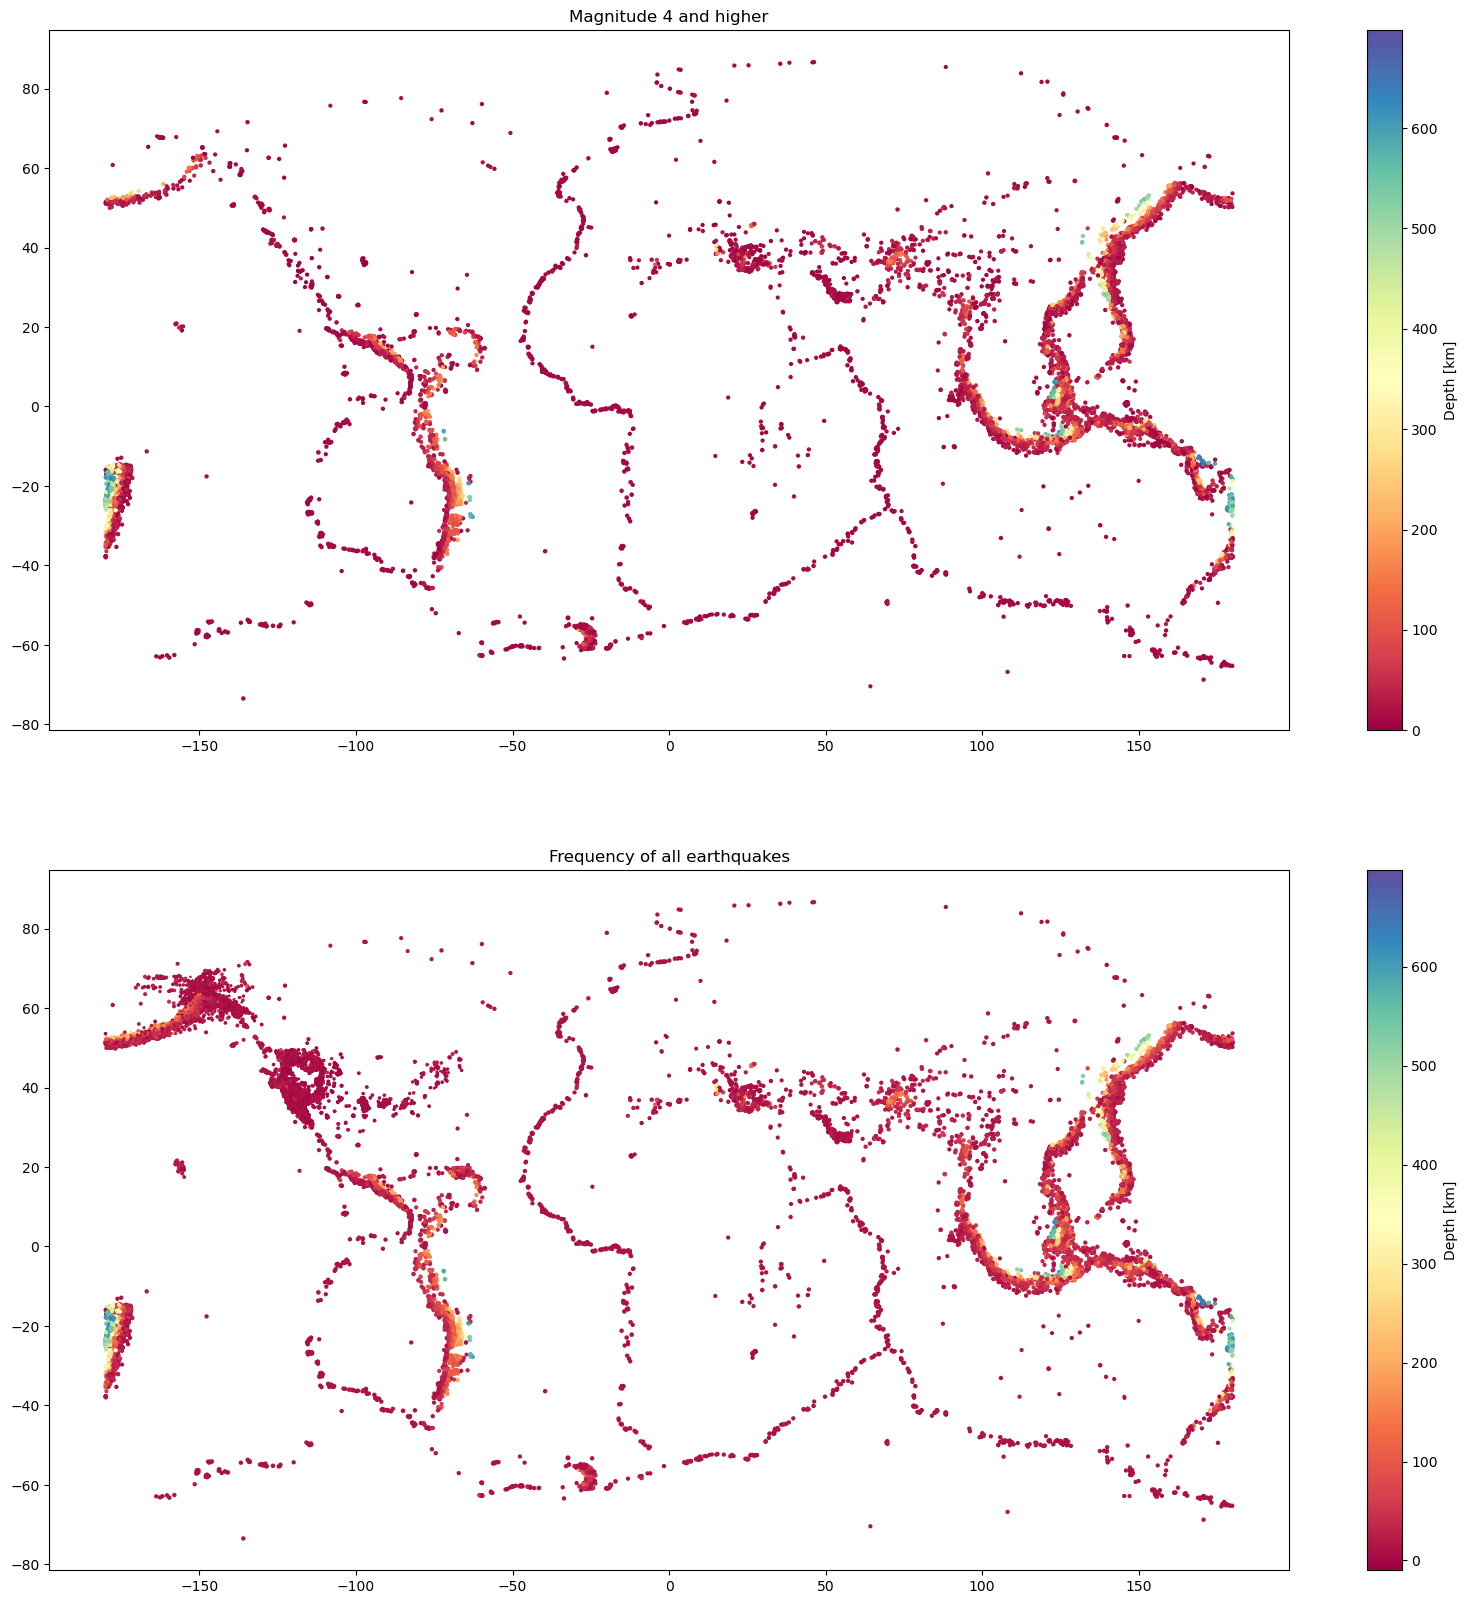

In [25]:
#create figure
plt.figure(figsize=(20, 20))

#create subplots
plt.subplot(2,1,1)
#make scatter plot
scatter = plt.scatter(magnitude_4_and_higher.longitude,
                      magnitude_4_and_higher.latitude,
                      s=magnitude_4_and_higher.mag,
                      c=magnitude_4_and_higher.depth,
                     cmap='Spectral')
#create colorbar
cbar = plt.colorbar(scatter)
# Set colorbar label
cbar.set_label('Depth [km]') 
#name subplot
plt.title('Magnitude 4 and higher')


#subplot 2
plt.subplot(2,1,2)
#make scatter plot
scatter = plt.scatter(data.longitude,
                      data.latitude,
                      s=data.mag,
                      c=data.depth,
                     cmap='Spectral')
#create colorbar
cbar = plt.colorbar(scatter) #format colorbar for 10^x)
# Set colorbar label
cbar.set_label('Depth [km]') 
#name subplot
plt.title('Frequency of all earthquakes')

plt.show()

Did you understand how these plots were created? <br>
Hint: Review the tutorial on Matplotlib.


Take a look [matplotlib.pyplot](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for more `cmap` options. Try improving or changing aspects of the code above.

#### Final Thoughts

By now, you should have acquired a foundational understanding of `Pandas` and its significance in data analysis and manipulation. Widely utilized in advanced scientific computing, `Pandas` offers extensive capabilities that we will delve into further in upcoming sections. Before progressing, ensure you comprehend and validate the calculations and transformations introduced in this chapter to solidify your grasp of the material. 

